In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pulp import *
import seaborn as sns

## Handle Data

In [2]:
hist_gdp = pd.read_csv("./data/gdp_category.csv", index_col=0).iloc[:, 3:]
hist_gdp[hist_gdp.columns[0:]] = hist_gdp[hist_gdp.columns[0:]].replace('\$|,', '', regex=True).astype(float)

hist_gdp

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,,,,
Health,13024.0,13126.0,13675.0,13901.0,13495.0,13528.0,14122.0,14136.0,14334.0,14603.0,...,15127.0,15213.0,15450.0,15593.0,16019.0,16494.0,17119.0,17725.0,17192.0,19064.0
Education,8490.0,8593.0,8897.0,9039.0,9150.0,9332.0,9720.0,10276.0,10599.0,10723.0,...,11375.0,11521.0,11287.0,11780.0,11869.0,12165.0,12709.0,13074.0,12815.0,13417.0
Social Services,18436.0,17717.0,18824.0,18986.0,19736.0,20927.0,21137.0,22623.0,22603.0,22014.0,...,22418.0,22605.0,23567.0,24279.0,25239.0,25769.0,26449.0,26876.0,21563.0,23420.0
Natural Resources and Economic Development,36202.0,36432.0,36357.0,37325.0,40513.0,43186.0,45278.0,44713.0,43932.0,39634.0,...,45775.0,46166.0,48984.0,49267.0,50150.0,51936.0,54553.0,55210.0,55379.0,58854.0
Transportation,9019.0,8997.0,9126.0,9166.0,9461.0,10257.0,10357.0,10414.0,10197.0,10196.0,...,10983.0,11534.0,12154.0,12624.0,12847.0,14190.0,14518.0,14891.0,11914.0,12150.0
General Government,9836.0,10038.0,10473.0,10421.0,10464.0,10467.0,10986.0,11291.0,11925.0,12619.0,...,12736.0,12666.0,12473.0,12607.0,12754.0,12911.0,13317.0,13549.0,13342.0,14076.0
Other,59140.0,60616.0,64000.0,66479.0,69150.0,72435.0,76891.0,81110.0,82019.0,80984.0,...,88174.0,91877.0,95207.0,97908.0,101775.0,105635.0,109411.0,113730.0,115317.0,121922.0


In [3]:
hist_financials = pd.read_csv("./data/historial_rev_expense_gdp.csv", index_col=0).iloc[:, :-1]
hist_financials[hist_financials.columns[0:]] = hist_financials[hist_financials.columns[0:]].replace('[\$,]', '', regex=True).astype(float)

hist_financials

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Category,,,,,,,,,,,,,,,,,,,,,
Revenue,21846.0,24066.0,22962.0,22147.0,24793.0,30821.0,33749.0,35819.0,36857.0,35423.0,...,41832.0,42057.0,43717.0,46103.0,47602.0,51459.0,52020.0,57128.0,58660.0,62156.0
Health,7304.0,8985.0,8091.0,9567.0,10945.0,11633.0,12822.0,13248.0,14260.0,15089.0,...,16917.0,17502.0,17862.0,18370.0,19203.0,19689.0,20927.0,22151.0,23449.0,25605.0
Education,5483.0,6436.0,6129.0,6221.0,6899.0,9022.0,9053.0,9758.0,10000.0,10466.0,...,11227.0,11528.0,11827.0,11827.0,12212.0,12468.0,13092.0,14089.0,14735.0,14943.0
Social Services,2819.0,3263.0,3044.0,2700.0,2871.0,2665.0,2798.0,2892.0,3045.0,3246.0,...,3940.0,3990.0,3805.0,3847.0,4106.0,4243.0,4737.0,5343.0,5887.0,7789.0
Natural Resources and Economic Development,1288.0,1578.0,1639.0,1371.0,1496.0,1670.0,1638.0,1677.0,1961.0,1763.0,...,1873.0,2092.0,1755.0,2191.0,2477.0,2504.0,3374.0,3825.0,3778.0,4191.0
Transportation,1532.0,1546.0,1365.0,1557.0,1267.0,1448.0,1203.0,1270.0,1398.0,1422.0,...,1415.0,1346.0,1184.0,1288.0,1264.0,2260.0,1931.0,2021.0,2126.0,3360.0
General Government,355.0,407.0,471.0,469.0,491.0,505.0,2182.0,753.0,1106.0,809.0,...,2834.0,1262.0,1386.0,1359.0,1501.0,1532.0,1540.0,1670.0,1653.0,3915.0
Other,3418.0,3861.0,3362.0,3199.0,3922.0,3715.0,4697.0,4859.0,5228.0,5423.0,...,5440.0,5484.0,5582.0,5557.0,6028.0,6026.0,6106.0,6498.0,7354.0,7821.0
Real GDP,136411.0,138815.0,143993.0,151958.0,164600.0,177197.0,190479.0,200440.0,206427.0,198179.0,...,223328.0,230981.0,243872.0,250784.0,263912.0,282283.0,297392.0,308993.0,306947.0,350598.0


In [4]:
hist_rev = hist_financials.iloc[0, :]
hist_expenses = hist_financials.iloc[1:-1, :]
hist_total_gdp = hist_financials.iloc[-1, :]


## Model Historical Data

In [5]:
cols = [(1.0, 0.341, 0.2), (0.969, 0.863, 0.435), (0.18, 0.8, 0.443),
        (0.204, 0.596, 0.859), (0.608, 0.349, 0.714), (0.906, 0.298, 0.235), (0.102, 0.737, 0.612)]

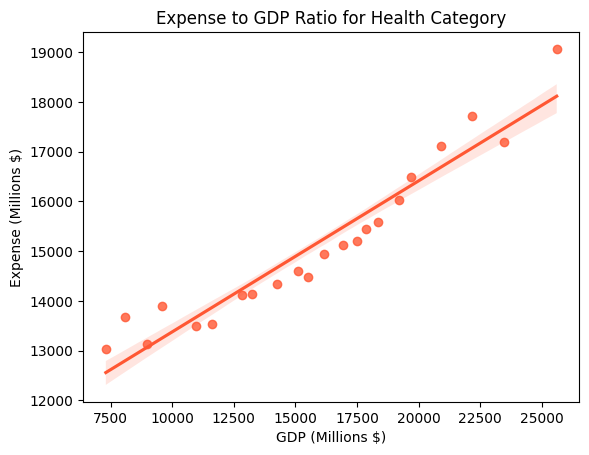

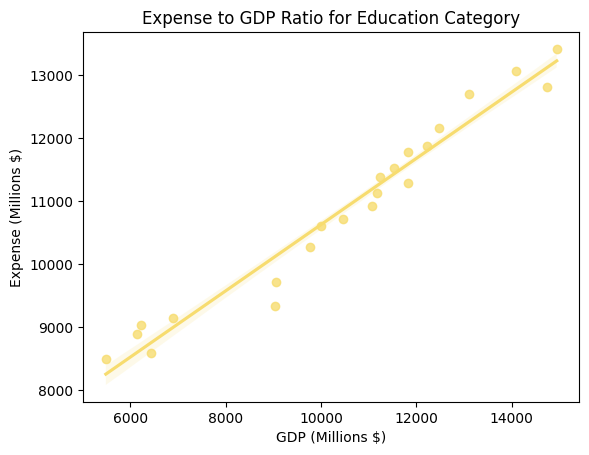

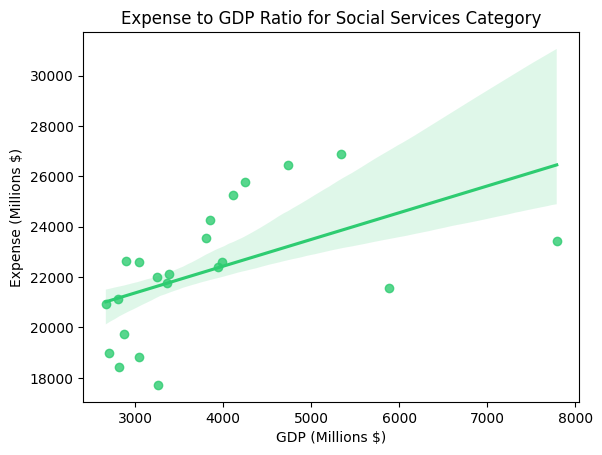

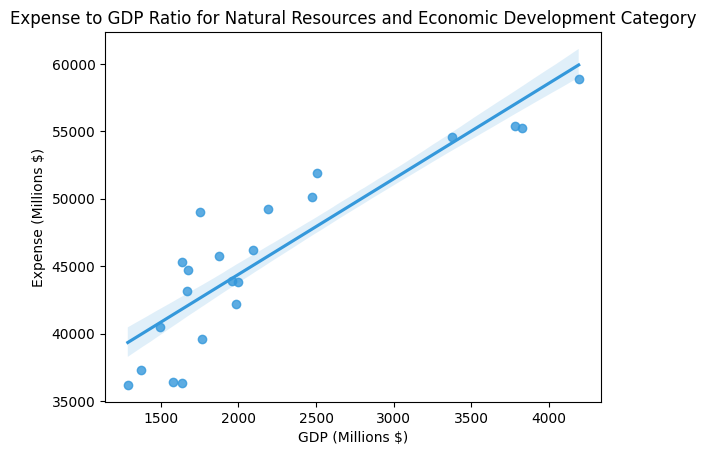

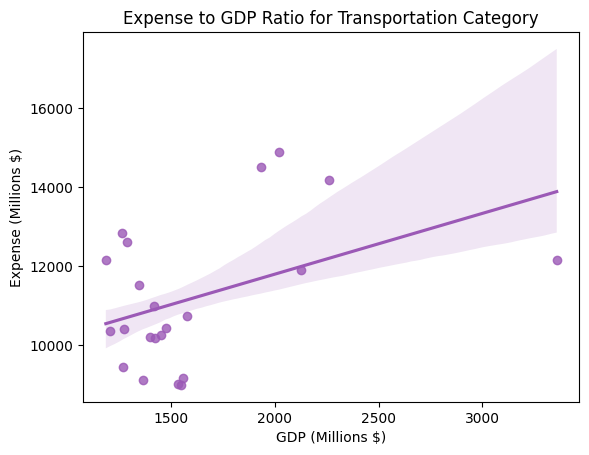

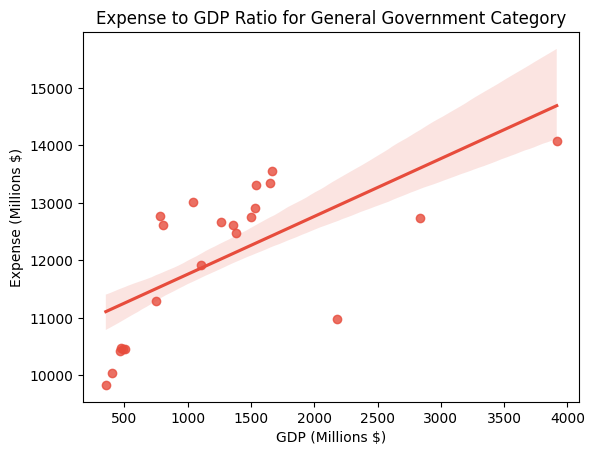

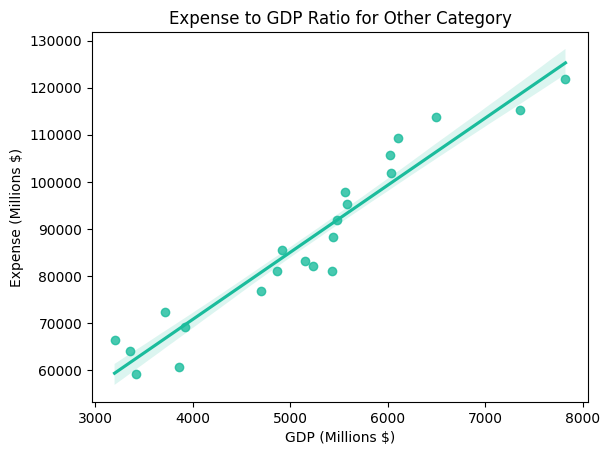

In [6]:
models = []

for i in range(0, len(hist_gdp)):
    name = hist_gdp.iloc[i].name
    gdp = hist_gdp.iloc[i,:]
    expense = hist_expenses.iloc[i,:]
    
    plt.figure(i)
    col = (np.random.random(), np.random.random(), np.random.random())
    reg = sns.regplot(x=expense.values, y=gdp.values, ci = 68, fit_reg=True, scatter=True, color = cols[i])
    reg.set(ylabel='Expense (Millions $)',
            xlabel='GDP (Millions $)',
            title='Expense to GDP Ratio for ' + name + ' Category')
    
    alpha = 0.32 # 68% confidence interval
    lr = sm.OLS(gdp, sm.add_constant(expense)).fit()
    models.append(lr)

In [7]:
conf_intervals = []

for lr in models:
    conf_interval = lr.conf_int(alpha)
    conf_intervals.append(conf_interval.iloc[-1, :])
conf_intervals

[0    0.282779
 1    0.324179
 Name: Health, dtype: float64,
 0    0.501481
 1    0.550397
 Name: Education, dtype: float64,
 0    0.659931
 1    1.462201
 Name: Social Services, dtype: float64,
 0    6.262428
 1    7.911232
 Name: Natural Resources and Economic Development, dtype: float64,
 0    0.790536
 1    2.280573
 Name: Transportation, dtype: float64,
 0    0.754242
 1    1.256824
 Name: General Government, dtype: float64,
 0    13.308526
 1    15.223847
 Name: Other, dtype: float64]

## Visualizations

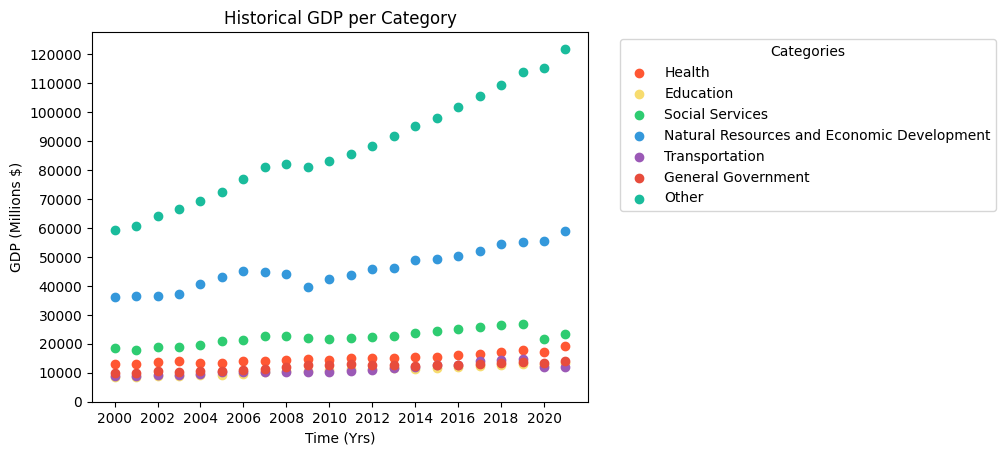

In [8]:
# GDP per category

df_gdp = hist_gdp.transpose()
df_gdp.index = df_gdp.index.astype(int)

columns = df_gdp.columns[0:]

fig, ax = plt.subplots()

for i, column in enumerate(columns):
    ax.scatter(df_gdp.index.values, df_gdp[column].values, label=column, c = np.asarray(cols[i]).reshape(1,-1))

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "Categories")

plt.title("Historical GDP per Category")
plt.xlabel("Time (Yrs)")
plt.ylabel("GDP (Millions $)")

plt.xticks(range(2000, 2021, 2))
df_max = np.max(df_gdp.max()).astype(int)
plt.yticks(range(0, df_max, 10000))

plt.show()

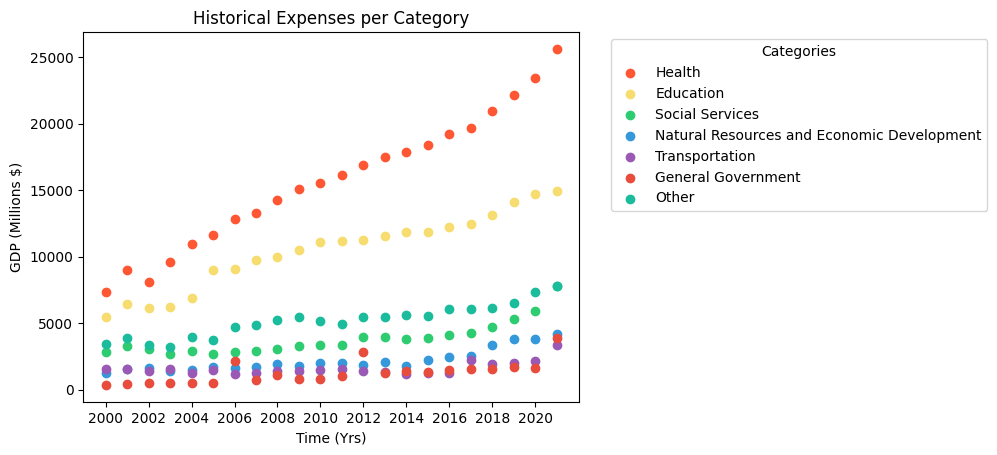

In [9]:
# Expenses per category

df_exp = hist_expenses.transpose()
df_exp.index = df_gdp.index.astype(int)

columns = df_exp.columns[0:]

fig_2, ax_2 = plt.subplots()

for i, column in enumerate(columns):
    ax_2.scatter(df_exp.index.values, df_exp[column].values, label=column, c = np.asarray(cols[i]).reshape(1,-1))

ax_2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = "Categories")

plt.title("Historical Expenses per Category")
plt.xlabel("Time (Yrs)")
plt.ylabel("GDP (Millions $)")

plt.xticks(range(2000, 2021, 2))

plt.show()

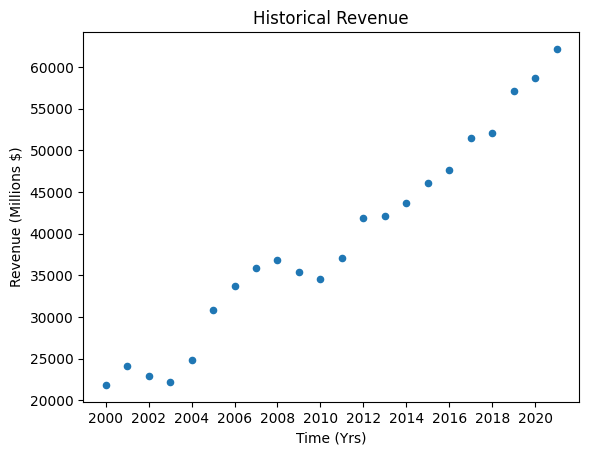

In [10]:
# Revenue

df_rev = hist_rev.reset_index()

df_rev["index"] = df_rev["index"].astype(int)

df_rev.plot(kind = "scatter", x = "index", y = "Revenue")
plt.xticks(range(2000, 2021, 2))
plt.title("Historical Revenue")
plt.xlabel("Time (Yrs)")
plt.ylabel("Revenue (Millions $)")

plt.show()

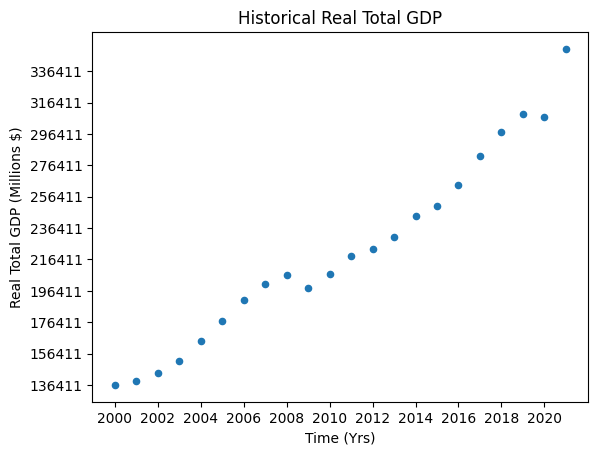

In [11]:
# Real Total GDP

df_total_gdp = hist_total_gdp.reset_index()

df_total_gdp["index"] = df_total_gdp["index"].astype(int)

df_total_gdp["Real GDP"]

df_total_gdp.plot(kind = "scatter", x = "index", y = "Real GDP")

df_max = np.max(df_total_gdp["Real GDP"].max()).astype(int)
df_min = np.min(df_total_gdp["Real GDP"].min()).astype(int)
plt.xticks(range(2000, 2021, 2))
plt.yticks(range(df_min, df_max, 20000))

plt.title("Historical Real Total GDP")
plt.xlabel("Time (Yrs)")
plt.ylabel("Real Total GDP (Millions $)")

plt.show()

## Construct LP Problem

In [12]:
last_year_gdp = 1 / hist_financials.iloc[1:-1, -1]
r = hist_rev = hist_financials.iloc[0, :].to_numpy()

In [21]:
hist_financials.iloc[1:-1, -1]

Category
Health                                        25605.0
Education                                     14943.0
Social Services                                7789.0
Natural Resources and Economic Development     4191.0
Transportation                                 3360.0
General Government                             3915.0
Other                                          7821.0
Name: 2021, dtype: float64

In [13]:
x = [i for i in range(1, 8)]

items = LpVariable.dicts("", x, 0)

In [14]:
prob = LpProblem("Prob", LpMinimize)

In [15]:
prob += lpSum([last_year_gdp[i] * items[i + 1] for i in range(0, len(last_year_gdp))]), "Objective Function"

In [16]:
prob += lpSum(items[i + 1] for i in range(0, len(last_year_gdp))) <= r, "Income Constraint"

In [17]:
for i in range(0, len(conf_intervals)):
    prob += last_year_gdp[i] * items[i + 1] >= conf_intervals[i][0]
    prob += last_year_gdp[i] * items[i + 1] <= conf_intervals[i][1]

In [18]:
prob

Prob:
MINIMIZE
3.905487209529389e-05*_1 + 6.692096633875393e-05*_2 + 0.00012838618564642445*_3 + 0.00023860653781913624*_4 + 0.00029761904761904765*_5 + 0.0002554278416347382*_6 + 0.00012786088735455825*_7 + 0.0
SUBJECT TO
Income_Constraint: _1 + _2 + _3 + _4 + _5 + _6 + _7 <= 862733

_C1: 3.90548720953e-05 _1 >= 0.282779305052

_C2: 3.90548720953e-05 _1 <= 0.324179418611

_C3: 6.69209663388e-05 _2 >= 0.501481119233

_C4: 6.69209663388e-05 _2 <= 0.550397118575

_C5: 0.000128386185646 _3 >= 0.659930750914

_C6: 0.000128386185646 _3 <= 1.46220101296

_C7: 0.000238606537819 _4 >= 6.26242755543

_C8: 0.000238606537819 _4 <= 7.91123180292

_C9: 0.000297619047619 _5 >= 0.790536302074

_C10: 0.000297619047619 _5 <= 2.28057287676

_C11: 0.000255427841635 _6 >= 0.754242470658

_C12: 0.000255427841635 _6 <= 1.2568244211

_C13: 0.000127860887355 _7 >= 13.3085264984

_C14: 0.000127860887355 _7 <= 15.2238465782

VARIABLES
_1 Continuous
_2 Continuous
_3 Continuous
_4 Continuous
_5 Continuous
_6 Cont

In [19]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/siddharthnand/.pyenv/versions/3.11.2/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/0x/n88cgv0j59x_s2q__xqkm0xc0000gn/T/755d320016ac4256a957156777069758-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/0x/n88cgv0j59x_s2q__xqkm0xc0000gn/T/755d320016ac4256a957156777069758-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 20 COLUMNS
At line 49 RHS
At line 65 BOUNDS
At line 66 ENDATA
Problem MODEL has 15 rows, 7 columns and 21 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-15) rows, 0 (-7) columns and 0 (-21) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 22.559924
After Postsolve, objective 22.559924, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 22.559924 - 0 iterations time 0.002, Presolve 0.00
Option

1

## Solve

In [20]:
for a in prob.variables():
    print(a.name, "=", a.varValue)
print("z = ", prob.objective.value())

_1 = 7240.5641
_2 = 7493.6324
_3 = 5140.2006
_4 = 26245.834
_5 = 2656.202
_6 = 2952.8593
_7 = 104085.99
z =  22.559924587577456
